<a href="https://colab.research.google.com/github/viththiananth/20220922-Deep_Learning_Assignment-Neural_Network_on_MNIST/blob/2022_09_29-After-Remove-CNN-Part/Neural_Network_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using ANN:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#Split the date into training and test dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


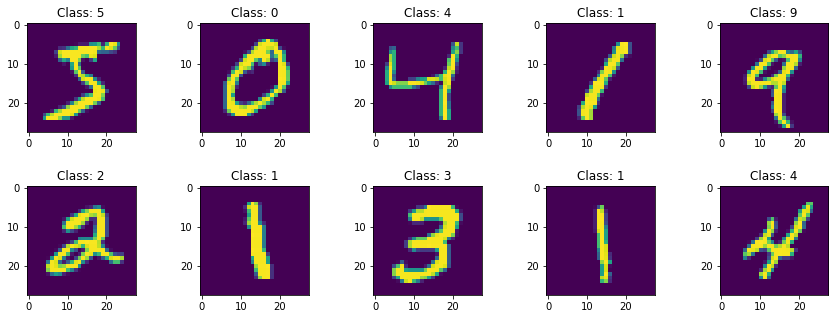

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

8


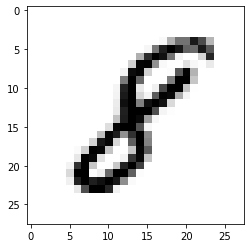

In [ ]:
   #To visualize these numbers, we can get help from matplotlib.
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

8


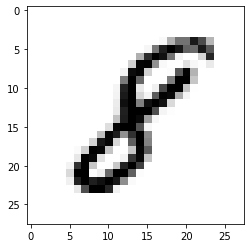

In [ ]:
# Normalize and print the image
x_train1 = x_train.astype('float32')
x_test1 = x_test.astype('float32')
x_train1 /= 255
x_test1 /= 255

print(y_train[image_index]) # The label is 8
plt.imshow(x_train1[image_index], cmap='Greys')

In [ ]:
#Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128, activation=tf.nn.sigmoid))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=200,validation_data=(x_test, y_test)).history

Epoch 1/20
300/300 [==============================] - 3s 8ms/step - loss: 0.7982 - accuracy: 0.7574 - val_loss: 0.3044 - val_accuracy: 0.9127
Epoch 2/20
300/300 [==============================] - 2s 8ms/step - loss: 0.3519 - accuracy: 0.8948 - val_loss: 0.2203 - val_accuracy: 0.9332
Epoch 3/20
300/300 [==============================] - 2s 8ms/step - loss: 0.2776 - accuracy: 0.9169 - val_loss: 0.1931 - val_accuracy: 0.9405
Epoch 4/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2424 - accuracy: 0.9279 - val_loss: 0.1706 - val_accuracy: 0.9494
Epoch 5/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2212 - accuracy: 0.9340 - val_loss: 0.1553 - val_accuracy: 0.9523
Epoch 6/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1983 - accuracy: 0.9413 - val_loss: 0.1441 - val_accuracy: 0.9557
Epoch 7/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1899 - accuracy: 0.9445 - val_loss: 0.1413 - val_accuracy: 0.9581
Epoch 

In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (200, 784)                0         
                                                                 
 dense_13 (Dense)            (200, 128)                100480    
                                                                 
 dropout_7 (Dropout)         (200, 128)                0         
                                                                 
 dense_14 (Dense)            (200, 128)                16512     
                                                                 
 dropout_8 (Dropout)         (200, 128)                0         
                                                                 
 dense_15 (Dense)            (200, 10)                 1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-tr

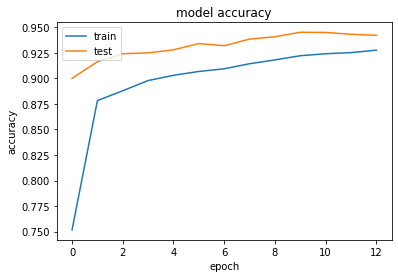

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

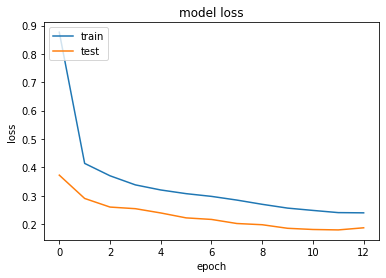

In [ ]:
#Loss along with epochs
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Optimization Methods
1. Cross-Validation
2. Image Augmentation
3. Regularization (Dropout Layer)
4. Increasing the number of epochs
5. Adding more Dense layer
6. Adding CNN layers